In [115]:
# Dataset represents the prevalence of different diseases in Europe by country and sex

import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import json


In [116]:
# load geojson file with Europe coordinates
countries_map = geopandas.read_file('euromap.geojson')
countries_map.head(5)

,name,created_at,updated_at,cartodb_id,geometry
0,Andorra,2012-08-29T00:00:00,2012-08-29T00:00:00,1,"(POLYGON ((1.710967 42.473499, 1.533333 42.436..."
1,Isle of Man,2012-08-29T00:00:00,2012-08-29T00:00:00,3,"(POLYGON ((-4.784167 54.056931, -4.714168 54.2..."
2,Norway,2012-08-29T00:00:00,2012-08-29T00:00:00,4,"(POLYGON ((15.47778 68.877762, 15.42028 68.911..."
3,Liechtenstein,2012-08-29T00:00:00,2012-08-29T00:00:00,5,"(POLYGON ((9.47583 47.058041, 9.51166500000000..."
4,Switzerland,2012-08-29T00:00:00,2012-08-29T00:00:00,6,"(POLYGON ((9.54041 47.266975, 9.484161 47.1922..."


In [117]:
# rename name column to geo (for merging of the datasets)
countries_map = countries_map.rename(columns={'name': 'geo'})
countries_map.head()

,geo,created_at,updated_at,cartodb_id,geometry
0,Andorra,2012-08-29T00:00:00,2012-08-29T00:00:00,1,"(POLYGON ((1.710967 42.473499, 1.533333 42.436..."
1,Isle of Man,2012-08-29T00:00:00,2012-08-29T00:00:00,3,"(POLYGON ((-4.784167 54.056931, -4.714168 54.2..."
2,Norway,2012-08-29T00:00:00,2012-08-29T00:00:00,4,"(POLYGON ((15.47778 68.877762, 15.42028 68.911..."
3,Liechtenstein,2012-08-29T00:00:00,2012-08-29T00:00:00,5,"(POLYGON ((9.47583 47.058041, 9.51166500000000..."
4,Switzerland,2012-08-29T00:00:00,2012-08-29T00:00:00,6,"(POLYGON ((9.54041 47.266975, 9.484161 47.1922..."


In [118]:
# load dataset with diseases
euro_diseases = pd.read_csv('eurostat2014diseasep-april-2019-european-disease-prevalence-projecthealthviz-QueryResult.csv')
euro_diseases.head(5)

,sex,hlth_pb,geo,unit,time,isced11,value
0,Total,Arthrosis,European Union - 28 countries,Percentage,2014,All ISCED 2011 levels,14.1
1,Total,Arthrosis,Belgium,Percentage,2014,All ISCED 2011 levels,16.7
2,Total,Arthrosis,Bulgaria,Percentage,2014,All ISCED 2011 levels,7.5
3,Total,Arthrosis,Czechia,Percentage,2014,All ISCED 2011 levels,12.3
4,Total,Arthrosis,Denmark,Percentage,2014,All ISCED 2011 levels,17.3


In [119]:
# print all unique diseases and the amount of their values (confirm if they have the same length)
euro_diseases['hlth_pb'].value_counts()

Arthrosis                                                    96
Asthma                                                       96
Stroke or chronic consequences of stroke                     96
Low back disorder or other chronic back defect               96
Chronic depression                                           96
Heart attack or chronic consequences of heart attack         96
High blood pressure                                          96
Neck disorder or other chronic neck defect                   96
Kidney problems                                              96
Cirrhosis of the liver                                       96
Chronic lower respiratory diseases (excluding asthma)        96
Coronary heart disease or angina pectoris                    96
Allergy                                                      96
Urinary incontinence, problems in controlling the bladder    96
Diabetes                                                     96
Name: hlth_pb, dtype: int64

In [120]:
# create a new column (copy of the hlth_pb column) in which to shorten some of the diseases names
euro_diseases['disease_short'] = euro_diseases['hlth_pb']
euro_diseases.head()

,sex,hlth_pb,geo,unit,time,isced11,value,disease_short
0,Total,Arthrosis,European Union - 28 countries,Percentage,2014,All ISCED 2011 levels,14.1,Arthrosis
1,Total,Arthrosis,Belgium,Percentage,2014,All ISCED 2011 levels,16.7,Arthrosis
2,Total,Arthrosis,Bulgaria,Percentage,2014,All ISCED 2011 levels,7.5,Arthrosis
3,Total,Arthrosis,Czechia,Percentage,2014,All ISCED 2011 levels,12.3,Arthrosis
4,Total,Arthrosis,Denmark,Percentage,2014,All ISCED 2011 levels,17.3,Arthrosis


In [121]:
# shorten the names of some diseases
euro_diseases.disease_short.replace('Stroke or chronic consequences of stroke', 'Stroke', inplace=True)
euro_diseases.disease_short.replace('Coronary heart disease or angina pectoris', 'Coronary heart disease', inplace=True)
euro_diseases.disease_short.replace('Heart attack or chronic consequences of heart attack', 'Heart attack', inplace=True)
euro_diseases.disease_short.replace('Low back disorder or other chronic back defect', 'Low back disorder', inplace=True)
euro_diseases.disease_short.replace('Urinary incontinence, problems in controlling the bladder', 'Urinary incontinence', inplace=True)
euro_diseases.disease_short.replace('Neck disorder or other chronic neck defect', 'Neck disorder', inplace=True)
euro_diseases.disease_short.replace('Chronic lower respiratory diseases (excluding asthma)', 'Lower Respiratory Diseases', inplace=True)
euro_diseases.disease_short.value_counts()

Lower Respiratory Diseases    96
Urinary incontinence          96
Neck disorder                 96
Arthrosis                     96
Asthma                        96
Chronic depression            96
Coronary heart disease        96
High blood pressure           96
Heart attack                  96
Kidney problems               96
Cirrhosis of the liver        96
Stroke                        96
Allergy                       96
Low back disorder             96
Diabetes                      96
Name: disease_short, dtype: int64

In [122]:
# rename Czechia from euro_diseases dataset to Czech Republic (as per geojson file)
euro_diseases = euro_diseases.replace('Czechia', 'Czech Republic')
euro_diseases.head(5)

,sex,hlth_pb,geo,unit,time,isced11,value,disease_short
0,Total,Arthrosis,European Union - 28 countries,Percentage,2014,All ISCED 2011 levels,14.1,Arthrosis
1,Total,Arthrosis,Belgium,Percentage,2014,All ISCED 2011 levels,16.7,Arthrosis
2,Total,Arthrosis,Bulgaria,Percentage,2014,All ISCED 2011 levels,7.5,Arthrosis
3,Total,Arthrosis,Czech Republic,Percentage,2014,All ISCED 2011 levels,12.3,Arthrosis
4,Total,Arthrosis,Denmark,Percentage,2014,All ISCED 2011 levels,17.3,Arthrosis


In [123]:
# describe dataset
euro_diseases.describe()

,time,value
count,1440.0,1440.000000
mean,2014.0,8.271667
std,0.0,8.239935
min,2014.0,0.000000
25%,2014.0,2.200000
50%,2014.0,5.200000
75%,2014.0,12.000000
max,2014.0,41.400000


In [124]:
euro_diseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
sex              1440 non-null object
hlth_pb          1440 non-null object
geo              1440 non-null object
unit             1440 non-null object
time             1440 non-null int64
isced11          1440 non-null object
value            1440 non-null float64
disease_short    1440 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 90.1+ KB


In [125]:
euro_diseases.dtypes

sex               object
hlth_pb           object
geo               object
unit              object
time               int64
isced11           object
value            float64
disease_short     object
dtype: object

In [126]:
# clear not needed data
del euro_diseases['unit']
del euro_diseases['time']
del euro_diseases['isced11']
euro_diseases.head(5)

,sex,hlth_pb,geo,value,disease_short
0,Total,Arthrosis,European Union - 28 countries,14.1,Arthrosis
1,Total,Arthrosis,Belgium,16.7,Arthrosis
2,Total,Arthrosis,Bulgaria,7.5,Arthrosis
3,Total,Arthrosis,Czech Republic,12.3,Arthrosis
4,Total,Arthrosis,Denmark,17.3,Arthrosis


In [127]:
# rename Germany (until 1990 former territory of the FRG) to Germany
euro_diseases = euro_diseases.replace('Germany (until 1990 former territory of the FRG)', 'Germany')

In [128]:
# create new dataset without the values for Females
euro_diseases_total_only = euro_diseases[euro_diseases.sex != 'Females']
euro_diseases_total_only.head()

,sex,hlth_pb,geo,value,disease_short
0,Total,Arthrosis,European Union - 28 countries,14.1,Arthrosis
1,Total,Arthrosis,Belgium,16.7,Arthrosis
2,Total,Arthrosis,Bulgaria,7.5,Arthrosis
3,Total,Arthrosis,Czech Republic,12.3,Arthrosis
4,Total,Arthrosis,Denmark,17.3,Arthrosis


In [129]:
# create new dataset without the values for Males
euro_diseases_total_only = euro_diseases[euro_diseases.sex != 'Males']
euro_diseases_total_only.head()

,sex,hlth_pb,geo,value,disease_short
0,Total,Arthrosis,European Union - 28 countries,14.1,Arthrosis
1,Total,Arthrosis,Belgium,16.7,Arthrosis
2,Total,Arthrosis,Bulgaria,7.5,Arthrosis
3,Total,Arthrosis,Czech Republic,12.3,Arthrosis
4,Total,Arthrosis,Denmark,17.3,Arthrosis


In [130]:
# move EU in a separate dataset, drop them from euro_diseases_total_only dataset
e_union = euro_diseases_total_only[euro_diseases_total_only['geo'] == 'European Union - 28 countries']
e_union.head()

,sex,hlth_pb,geo,value,disease_short
0,Total,Arthrosis,European Union - 28 countries,14.1,Arthrosis
32,Total,Low back disorder or other chronic back defect,European Union - 28 countries,23.2,Low back disorder
64,Total,Neck disorder or other chronic neck defect,European Union - 28 countries,16.9,Neck disorder
96,Total,Asthma,European Union - 28 countries,5.9,Asthma
128,Total,Chronic lower respiratory diseases (excluding ...,European Union - 28 countries,4.1,Lower Respiratory Diseases


In [131]:
# remove EU total from euro_diseases_total_only dataset
euro_diseases_total_only = euro_diseases_total_only[euro_diseases_total_only.geo != 'European Union - 28 countries']

In [132]:
# group the diseases by country (in a separate dataset) for Total values only (no Males and Females)

diseases_by_country = euro_diseases_total_only.groupby(['geo', 'disease_short'])['value'].max()
diseases_by_country.reset_index()
diseases_by_country.head(50)

geo       disease_short             
Austria   Allergy                       26.5
          Arthrosis                     15.4
          Asthma                         4.7
          Chronic depression             9.5
          Cirrhosis of the liver         0.2
          Coronary heart disease         2.2
          Diabetes                       4.9
          Heart attack                   1.0
          High blood pressure           21.7
          Kidney problems                1.8
          Low back disorder             25.8
          Lower Respiratory Diseases     4.4
          Neck disorder                 22.7
          Stroke                         0.8
          Urinary incontinence           5.2
Belgium   Allergy                       15.6
          Arthrosis                     21.2
          Asthma                         4.3
          Chronic depression             8.3
          Cirrhosis of the liver         0.6
          Coronary heart disease         1.5
          Diabetes

In [133]:
# display all unique countries, convert numpy.ndarray to list
countries = euro_diseases_total_only.geo.unique()
countries_list = list(countries)
print(countries_list)

['Belgium', 'Bulgaria', 'Czech Republic', 'Denmark', 'Germany', 'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy', 'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta', 'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom', 'Iceland', 'Norway', 'Turkey']


In [134]:
# extract only max values for each country
euro_diseases_total_only = euro_diseases_total_only[euro_diseases_total_only.sex != 'Males']
euro_diseases_total_only = euro_diseases_total_only[euro_diseases_total_only.sex != 'Females']

max_per_country = euro_diseases_total_only.loc[euro_diseases_total_only.groupby('geo')['value'].idxmax()]

max_per_country = max_per_country.sort_values(['geo'],ascending=True)
max_per_country.head(500)

,sex,hlth_pb,geo,value,disease_short
52,Total,Low back disorder or other chronic back defect,Austria,24.4,Low back disorder
33,Total,Low back disorder or other chronic back defect,Belgium,20.8,Low back disorder
226,Total,High blood pressure,Bulgaria,29.6,High blood pressure
43,Total,Low back disorder or other chronic back defect,Croatia,29.0,Low back disorder
237,Total,High blood pressure,Cyprus,17.3,High blood pressure
227,Total,High blood pressure,Czech Republic,23.7,High blood pressure
228,Total,High blood pressure,Denmark,17.7,High blood pressure
38,Total,Low back disorder or other chronic back defect,Estonia,24.1,Low back disorder
90,Total,Neck disorder or other chronic neck defect,Finland,34.2,Neck disorder
42,Total,Low back disorder or other chronic back defect,France,29.6,Low back disorder


Text(0.5, 1.0, 'Diseases in the European Union')

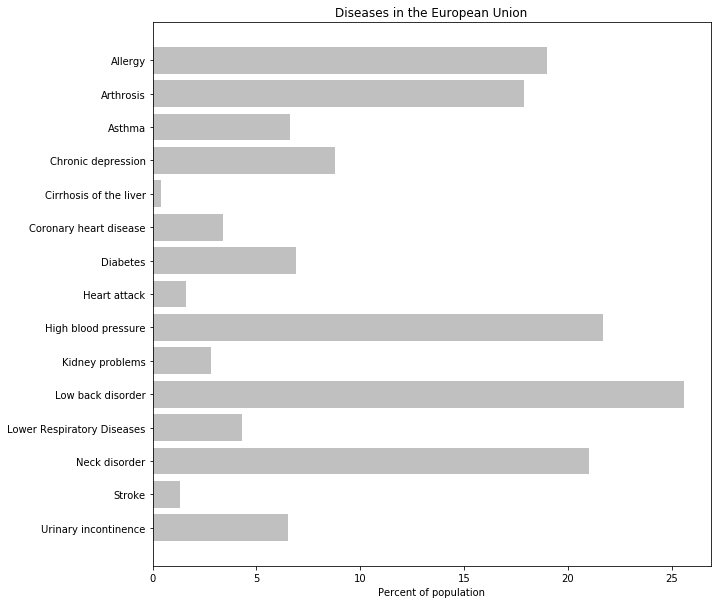

In [135]:
# show diseases in EU

plt.rcParams['figure.figsize'] = 10, 10

e_union = e_union.sort_values(['disease_short'], ascending=False)
plt.barh( e_union['disease_short'], e_union['value'], align='center', color='silver')

# add label and title
plt.xlabel('Percent of population')
plt.title('Diseases in the European Union')

# plt.savefig('eu_total_bar.png')

Text(0.5, 1.0, 'Diseases in Europe')

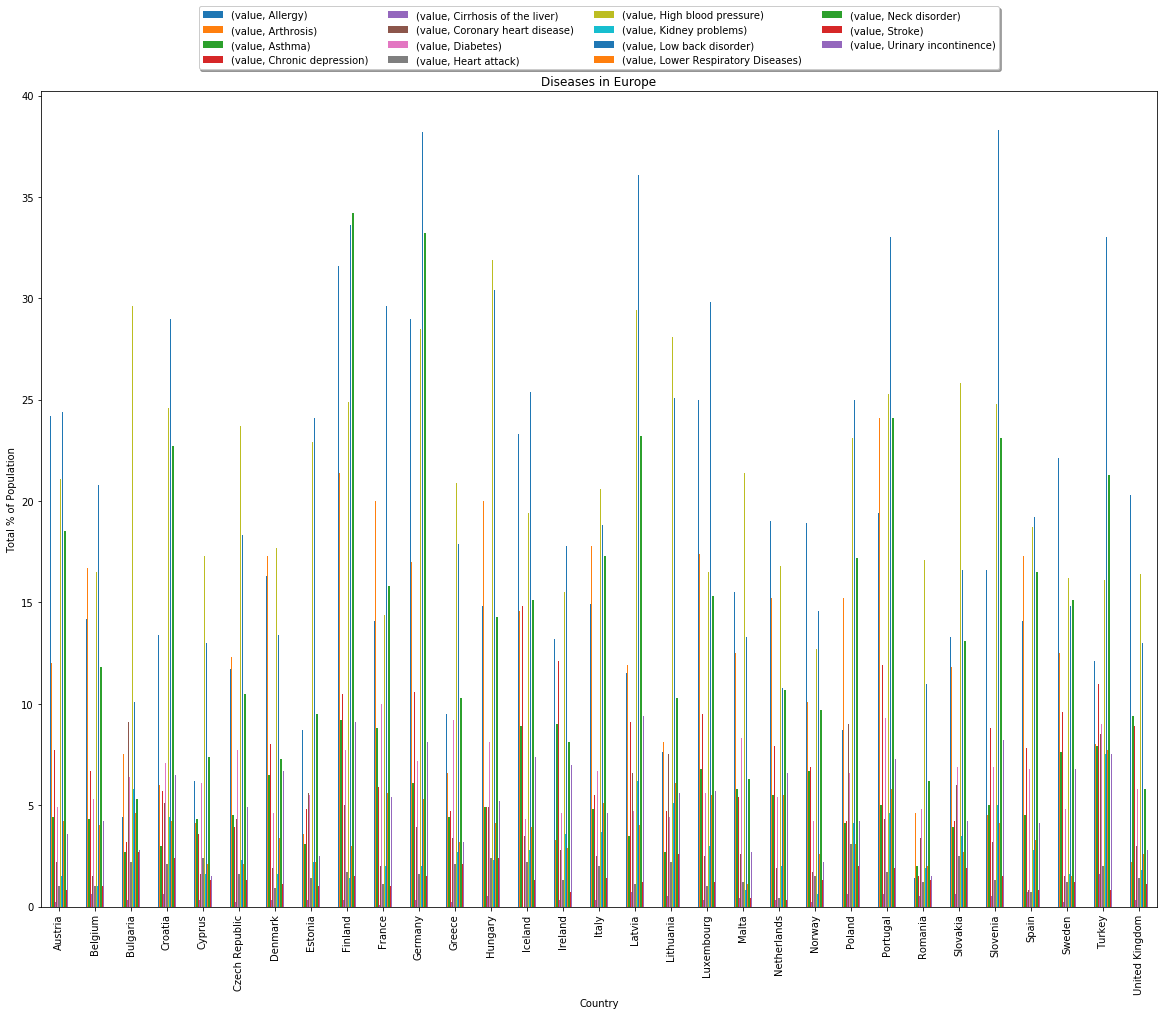

In [136]:
# visualize the diseases by prevalance in each country
euro_diseases_total_only.groupby(['disease_short', 'geo']).sum()[['value']].unstack('disease_short').plot.bar(
    figsize=(20, 15))
# Put a legend on top of the chart
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11),
          ncol=4, fancybox=True, shadow=True, prop={'size': 10})
# add labels and title
plt.xlabel('Country')
plt.ylabel('Total % of Population')
plt.title('Diseases in Europe')

# plt.savefig('all_countries.png')

In [137]:
# create a dataset for arthrosis only, using the euro_diseases_total_only data
arthrosis = euro_diseases_total_only[euro_diseases_total_only['hlth_pb'] == 'Arthrosis']
arthrosis.head()

,sex,hlth_pb,geo,value,disease_short
1,Total,Arthrosis,Belgium,16.7,Arthrosis
2,Total,Arthrosis,Bulgaria,7.5,Arthrosis
3,Total,Arthrosis,Czech Republic,12.3,Arthrosis
4,Total,Arthrosis,Denmark,17.3,Arthrosis
5,Total,Arthrosis,Germany,17.0,Arthrosis


In [138]:
# merge the countries_map and max_per_country datasets (for plotting a map)
merged_countries_and_diseases = countries_map.set_index('geo').join(max_per_country.set_index('geo'))
merged_countries_and_diseases.reset_index()
merged_countries_and_diseases.head()

,created_at,updated_at,cartodb_id,geometry,sex,hlth_pb,value,disease_short
geo,,,,,,,,
Andorra,2012-08-29T00:00:00,2012-08-29T00:00:00,1,"(POLYGON ((1.710967 42.473499, 1.533333 42.436...",NaN,NaN,NaN,NaN
Isle of Man,2012-08-29T00:00:00,2012-08-29T00:00:00,3,"(POLYGON ((-4.784167 54.056931, -4.714168 54.2...",NaN,NaN,NaN,NaN
Norway,2012-08-29T00:00:00,2012-08-29T00:00:00,4,"(POLYGON ((15.47778 68.877762, 15.42028 68.911...",Total,Allergy,18.9,Allergy
Liechtenstein,2012-08-29T00:00:00,2012-08-29T00:00:00,5,"(POLYGON ((9.47583 47.058041, 9.51166500000000...",NaN,NaN,NaN,NaN
Switzerland,2012-08-29T00:00:00,2012-08-29T00:00:00,6,"(POLYGON ((9.54041 47.266975, 9.484161 47.1922...",NaN,NaN,NaN,NaN


In [139]:
# drop NaNs
merged_countries_and_diseases = merged_countries_and_diseases.dropna()
merged_countries_and_diseases.head(5)

,created_at,updated_at,cartodb_id,geometry,sex,hlth_pb,value,disease_short
geo,,,,,,,,
Norway,2012-08-29T00:00:00,2012-08-29T00:00:00,4,"(POLYGON ((15.47778 68.877762, 15.42028 68.911...",Total,Allergy,18.9,Allergy
Netherlands,2012-08-29T00:00:00,2012-08-29T00:00:00,8,"(POLYGON ((4.230012 51.35722, 4.214999 51.3302...",Total,Allergy,19.0,Allergy
Slovenia,2012-08-29T00:00:00,2012-08-29T00:00:00,9,"(POLYGON ((16.026939 46.661369, 15.99333 46.73...",Total,Low back disorder or other chronic back defect,38.3,Low back disorder
Ireland,2012-08-29T00:00:00,2012-08-29T00:00:00,11,"(POLYGON ((-7.253056 55.070541, -7.251112 55.0...",Total,Low back disorder or other chronic back defect,17.8,Low back disorder
Estonia,2012-08-29T00:00:00,2012-08-29T00:00:00,14,"(POLYGON ((22.051661 57.90971, 22.000549 57.91...",Total,Low back disorder or other chronic back defect,24.1,Low back disorder


In [140]:
# merge the dataset for arthrosis only
merged_arthrosis = countries_map.set_index('geo').join(arthrosis.set_index('geo'))
merged_arthrosis.head()

,created_at,updated_at,cartodb_id,geometry,sex,hlth_pb,value,disease_short
geo,,,,,,,,
Andorra,2012-08-29T00:00:00,2012-08-29T00:00:00,1,"(POLYGON ((1.710967 42.473499, 1.533333 42.436...",NaN,NaN,NaN,NaN
Isle of Man,2012-08-29T00:00:00,2012-08-29T00:00:00,3,"(POLYGON ((-4.784167 54.056931, -4.714168 54.2...",NaN,NaN,NaN,NaN
Norway,2012-08-29T00:00:00,2012-08-29T00:00:00,4,"(POLYGON ((15.47778 68.877762, 15.42028 68.911...",Total,Arthrosis,10.1,Arthrosis
Liechtenstein,2012-08-29T00:00:00,2012-08-29T00:00:00,5,"(POLYGON ((9.47583 47.058041, 9.51166500000000...",NaN,NaN,NaN,NaN
Switzerland,2012-08-29T00:00:00,2012-08-29T00:00:00,6,"(POLYGON ((9.54041 47.266975, 9.484161 47.1922...",NaN,NaN,NaN,NaN


In [141]:
# remove nan values for arthrosis 
merged_arthrosis = merged_arthrosis.dropna()
merged_arthrosis.head()

,created_at,updated_at,cartodb_id,geometry,sex,hlth_pb,value,disease_short
geo,,,,,,,,
Norway,2012-08-29T00:00:00,2012-08-29T00:00:00,4,"(POLYGON ((15.47778 68.877762, 15.42028 68.911...",Total,Arthrosis,10.1,Arthrosis
Netherlands,2012-08-29T00:00:00,2012-08-29T00:00:00,8,"(POLYGON ((4.230012 51.35722, 4.214999 51.3302...",Total,Arthrosis,15.2,Arthrosis
Slovenia,2012-08-29T00:00:00,2012-08-29T00:00:00,9,"(POLYGON ((16.026939 46.661369, 15.99333 46.73...",Total,Arthrosis,4.5,Arthrosis
Ireland,2012-08-29T00:00:00,2012-08-29T00:00:00,11,"(POLYGON ((-7.253056 55.070541, -7.251112 55.0...",Total,Arthrosis,3.3,Arthrosis
Estonia,2012-08-29T00:00:00,2012-08-29T00:00:00,14,"(POLYGON ((22.051661 57.90971, 22.000549 57.91...",Total,Arthrosis,3.6,Arthrosis


(-31.556287449999996, 34.59413645, 25.5637213, 73.32569270000002)

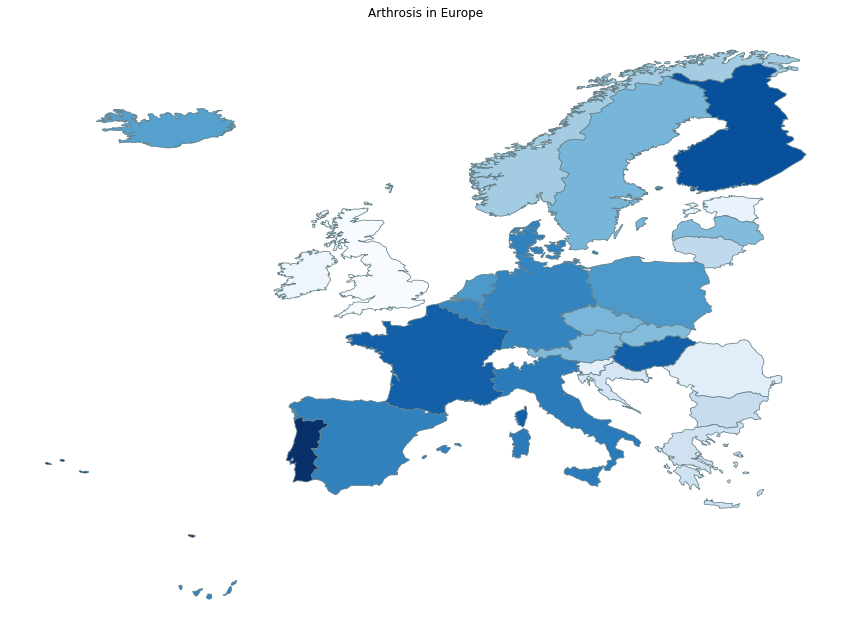

In [142]:
# show prevelance of arthrosis 
column_to_plot = merged_arthrosis['value']

fig, ax = plt.subplots(1, figsize=(15, 15))
merged_arthrosis.plot(column=column_to_plot, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='#68838B')

plt.title('Arthrosis in Europe')
plt.axis('off')

# plt.savefig('arthrosis_map.png')

In [143]:
# subset data for Bulgaria (including Males and Females)
bg = euro_diseases[euro_diseases['geo'] == 'Bulgaria']
bg.reset_index()
bg.head(5)

,sex,hlth_pb,geo,value,disease_short
2,Total,Arthrosis,Bulgaria,7.5,Arthrosis
34,Total,Low back disorder or other chronic back defect,Bulgaria,10.1,Low back disorder
66,Total,Neck disorder or other chronic neck defect,Bulgaria,5.3,Neck disorder
98,Total,Asthma,Bulgaria,2.7,Asthma
130,Total,Chronic lower respiratory diseases (excluding ...,Bulgaria,4.6,Lower Respiratory Diseases


Text(0, 0.5, 'Percent of the Population')

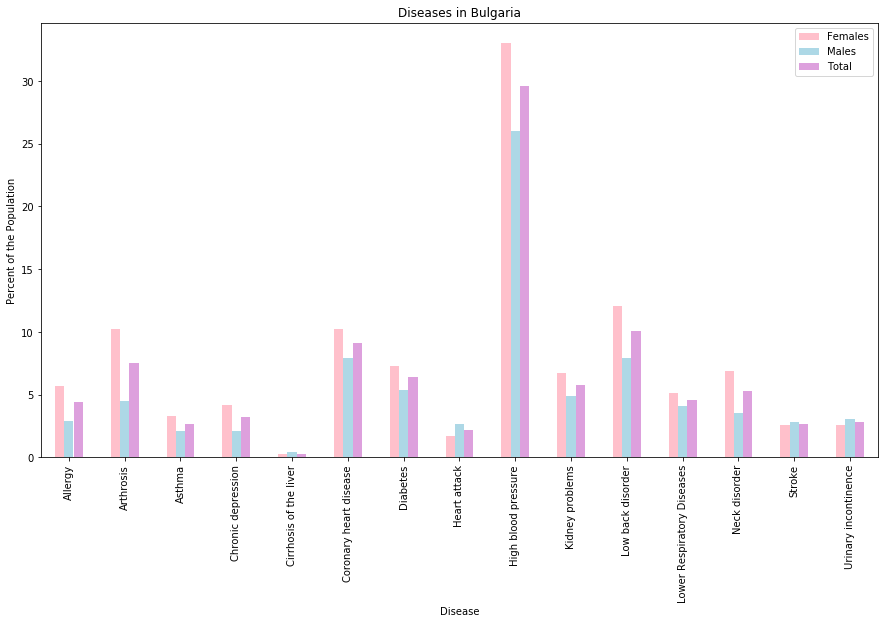

In [144]:
# grouepd bar of diseases in Bulgaria - grouped by sex
colors = ['pink', 'lightblue', 'plum']
bg.groupby(['disease_short', 'sex']).sum()[['value']].unstack('sex').plot.bar(figsize=(15, 8), color=colors, 
                                                                             title='Diseases in Bulgaria')

# add axis labels and title
plt.xticks(rotation='vertical')
plt.legend(['Females', 'Males', 'Total'])
plt.xlabel('Disease')
plt.ylabel('Percent of the Population')


# plt.savefig('diseases_bulgaria_by_sex.png')

In [145]:
# remove hlth_pb 
euro_diseases_only_short = euro_diseases.loc[:, ['sex', 'disease_short', 'geo', 'value']]
euro_diseases_only_short.head()

,sex,disease_short,geo,value
0,Total,Arthrosis,European Union - 28 countries,14.1
1,Total,Arthrosis,Belgium,16.7
2,Total,Arthrosis,Bulgaria,7.5
3,Total,Arthrosis,Czech Republic,12.3
4,Total,Arthrosis,Denmark,17.3


In [146]:
# rename disease_short column to hlth_pb
euro_diseases_only_short.rename(columns={'disease_short': 'hlth_pb'}, inplace=True)
euro_diseases_only_short.head()

,sex,hlth_pb,geo,value
0,Total,Arthrosis,European Union - 28 countries,14.1
1,Total,Arthrosis,Belgium,16.7
2,Total,Arthrosis,Bulgaria,7.5
3,Total,Arthrosis,Czech Republic,12.3
4,Total,Arthrosis,Denmark,17.3


In [147]:
# reshape the dataset - hlth_pb to columns
reshaped_diseases = euro_diseases_only_short.reset_index().pivot_table(index=['geo', 'sex'], columns='hlth_pb', 
                                                                       values='value')
reshaped_diseases.head()

hlth_pb          Allergy  Arthrosis  Asthma  Chronic depression  \
geo     sex                                                       
Austria Females     26.5       15.4     4.7                 9.5   
        Males       21.8        8.3     4.0                 5.7   
        Total       24.2       12.0     4.4                 7.7   
Belgium Females     15.6       21.2     4.2                 8.3   
        Males       12.7       11.8     4.4                 4.9   

hlth_pb          Cirrhosis of the liver  Coronary heart disease  Diabetes  \
geo     sex                                                                 
Austria Females                     0.2                     2.2       4.5   
        Males                       0.2                     2.1       5.4   
        Total                       0.2                     2.2       4.9   
Belgium Females                     0.6                     1.2       5.2   
        Males                       0.7                     1.7       5.4   

hlth_pb          Heart attack  High blood pressure  Kidney problems  \
geo     sex                                                           
Austria Females           0.6                 21.7              1.8   
        Males             1.4                 20.5              1.1   
        Total             1.0                 21.1              1.5   
Belgium Females           0.8                 17.3              0.9   
        Males             1.3                 15.6              1.0   

hlth_pb          Low back disorder  Lower Respiratory Diseases  Neck disorder  \
geo     sex                                                                     
Austria Females               25.8                         4.4           22.7   
        Males                 22.9                         4.0           14.1   
        Total                 24.4                         4.2           18.5   
Belgium Females               22.7                         4.4           14.3   
        Males                 18.7                         3.5            9.1   

hlth_pb          Stroke  Urinary incontinence  
geo     sex                                    
Austria Females     0.8                   5.2  
        Males       0.8                   2.0  
        Total       0.8                   3.6  
Belgium Females     0.9                   5.4  
        Males       1.1                   2.9

In [148]:
# load the csv file and convert it to json
final_df = pd.read_csv('clean_data/reshaped_diseases.csv')
json_data = final_df.to_dict(orient='records')
print(json_data)

[{'geo': 'Austria', 'sex': 'Females', 'Allergy': 26.5, 'Arthrosis': 15.4, 'Asthma': 4.7, 'Chronic depression': 9.5, 'Cirrhosis of the liver': 0.2, 'Coronary heart disease': 2.2, 'Diabetes': 4.5, 'Heart attack': 0.6, 'High blood pressure': 21.7, 'Kidney problems': 1.8, 'Low back disorder': 25.8, 'Lower Respiratory Diseases': 4.4, 'Neck disorder': 22.7, 'Stroke': 0.8, 'Urinary incontinence': 5.2}, {'geo': 'Austria', 'sex': 'Males', 'Allergy': 21.8, 'Arthrosis': 8.3, 'Asthma': 4.0, 'Chronic depression': 5.7, 'Cirrhosis of the liver': 0.2, 'Coronary heart disease': 2.1, 'Diabetes': 5.4, 'Heart attack': 1.4, 'High blood pressure': 20.5, 'Kidney problems': 1.1, 'Low back disorder': 22.9, 'Lower Respiratory Diseases': 4.0, 'Neck disorder': 14.1, 'Stroke': 0.8, 'Urinary incontinence': 2.0}, {'geo': 'Austria', 'sex': 'Total', 'Allergy': 24.2, 'Arthrosis': 12.0, 'Asthma': 4.4, 'Chronic depression': 7.7, 'Cirrhosis of the liver': 0.2, 'Coronary heart disease': 2.2, 'Diabetes': 4.9, 'Heart attack'

In [149]:
# make a list of all columns
columns = list(final_df.columns)
print(columns)

['geo', 'sex', 'Allergy', 'Arthrosis', 'Asthma', 'Chronic depression', 'Cirrhosis of the liver', 'Coronary heart disease', 'Diabetes', 'Heart attack', 'High blood pressure', 'Kidney problems', 'Low back disorder', 'Lower Respiratory Diseases', 'Neck disorder', 'Stroke', 'Urinary incontinence']


In [150]:
# create nested json
countries = []
conditions = columns[2:17]
thisCountry = {}
nested = []

for d in json_data:
    # for each of the countries
    if d['geo'] not in countries:
        # find unique country
        countries.append(d['geo'])
        thisCountry = { 'country': d['geo'], 'diseases': [] }
        
        # for each of the conditions
        for c in conditions:
            # append the disease and create 'breakdown' which contains 'gender'
            thisCountry['diseases'].append({ 'disease': c, 'breakdown': [{ 'gender': d['sex'], 'value': float(d[c]) }] })
    else:
        gender = {}
        
        # for each of the diseases
        for disease in thisCountry['diseases']:
            for c in conditions:
                # if the disease is in 'conditions'
                if disease['disease'] == c:
                    # create 'gender' which contains the sex and the value
                    gender = {'gender': d['sex'], 'value': float(d[c])}
                    
            # append the breakdown of Females, Males and Total
            disease['breakdown'].append(gender)
    
    # append the data for Males and Total
    if d['sex'] == 'Females':
        nested.append(thisCountry)

print(nested)

[{'country': 'Austria', 'diseases': [{'disease': 'Allergy', 'breakdown': [{'gender': 'Females', 'value': 26.5}, {'gender': 'Males', 'value': 21.8}, {'gender': 'Total', 'value': 24.2}]}, {'disease': 'Arthrosis', 'breakdown': [{'gender': 'Females', 'value': 15.4}, {'gender': 'Males', 'value': 8.3}, {'gender': 'Total', 'value': 12.0}]}, {'disease': 'Asthma', 'breakdown': [{'gender': 'Females', 'value': 4.7}, {'gender': 'Males', 'value': 4.0}, {'gender': 'Total', 'value': 4.4}]}, {'disease': 'Chronic depression', 'breakdown': [{'gender': 'Females', 'value': 9.5}, {'gender': 'Males', 'value': 5.7}, {'gender': 'Total', 'value': 7.7}]}, {'disease': 'Cirrhosis of the liver', 'breakdown': [{'gender': 'Females', 'value': 0.2}, {'gender': 'Males', 'value': 0.2}, {'gender': 'Total', 'value': 0.2}]}, {'disease': 'Coronary heart disease', 'breakdown': [{'gender': 'Females', 'value': 2.2}, {'gender': 'Males', 'value': 2.1}, {'gender': 'Total', 'value': 2.2}]}, {'disease': 'Diabetes', 'breakdown': [{'

In [151]:
# export the nested json
# with open (r'clean_data/euro_diseases.json', 'w') as json_file:
#     json.dump(nested, json_file)

In [152]:
# export the two datasets to csv (reshaped_diseases and euro_diseases)
# reshaped_diseases.to_csv(r'clean_data/reshaped_diseases.csv')
# euro_diseases.to_csv(r'clean_data/euro_diseases.csv')